## *Load Basic Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

## *Load Data*

In [3]:
url = "C:\\Users\\PC\\Desktop\\Ciencias de datos\\Proyectos\\Criaglist\\data\\vehicles.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# *Data Preprocesing*

## Drop Columns

In [5]:
drops = ['id','url','region_url',
         'size','image_url','description',
         'county','state','lat',
        'long','posting_date','VIN',
         'region']

In [6]:
df = df.drop(columns = drops)

Eliminate variables that do not provide predictive value.

In [7]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## NaN Values

In [8]:
def nan_percent(df):
    
    return df.isnull().sum() / df.shape[0]

In [9]:
null_values_per = nan_percent(df)

In [10]:
null_values_per

price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
drive           0.305863
type            0.217527
paint_color     0.305011
dtype: float64

The Year variable can replace the missing values by some statistical measure, in this case I will choose to use the median, while for the object type variables we can replace with the modal value.

In [11]:
df['year'] = df.year.fillna(df.year.median())
df['odometer'] = df.odometer.fillna(df['odometer'].median())

We replace the missing values by the median.

In [12]:
obj_columns = df.select_dtypes('object').columns
obj_columns = [column for column in obj_columns if null_values_per[column] > 0 and null_values_per[column] <= 0.10]

We select those variables of the object type that have less than 10% of null values.

In [13]:
for column in obj_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

We replace the missing values by the mode.

In [14]:
nan_percent(df)

price           0.000000
year            0.000000
manufacturer    0.000000
model           0.000000
condition       0.407852
cylinders       0.416225
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
drive           0.305863
type            0.217527
paint_color     0.305011
dtype: float64

## *Ordinal Data*

In [15]:
df.cylinders.unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [16]:
df.cylinders = df.cylinders.str.replace('cylinders','')

In [17]:
df.cylinders.unique()

array([nan, '8 ', '6 ', '4 ', '5 ', 'other', '3 ', '10 ', '12 '],
      dtype=object)

In [18]:
df = df.query('cylinders!="other"')

Since the cylinders variable is of nominal type, it is recommended to eliminate the "other" sub-category, since it does not provide a real value.

In [19]:
df.cylinders = df.cylinders.astype(np.float32)

We replace the string of characters, eliminate categories that do not add value and convert the variable to a numeric type.

In [20]:
df.condition.unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [21]:
colors = sns.color_palette('pastel')
plt.style.use('ggplot')

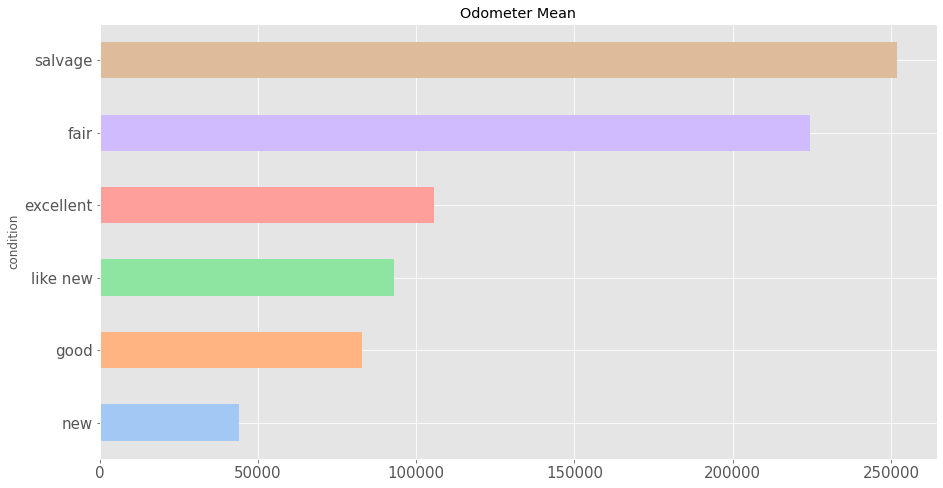

In [22]:
df.groupby('condition')['odometer'] \
.mean() \
.sort_values() \
.plot(kind = "barh",
      color = colors,
      figsize = (15,8),
      title = "Odometer Mean",
     fontsize = 15)
plt.show()

New cars have zero mileage, so I will choose to change the category "new" to "like new".

In [23]:
df.condition = np.where(df.condition == 'new','like new',df.condition)

In [24]:
df.groupby('condition')['odometer'] \
.mean() \
.sort_values()

condition
good          82875.316572
like new      90107.051868
excellent    105778.566466
fair         224468.662039
salvage      251844.868151
Name: odometer, dtype: float64

In [25]:
df.condition = df.condition.replace(['salvage','fair',
                                     'good','excellent',
                                     'like new'],
                                    [0,1,2,3,4])

# Feature Enginiering

In [26]:
df[['year','odometer','price']].agg({'min','max'})

,year,odometer,price
max,2022.0,10000000.0,3736928711
min,1900.0,0.0,0


There are indications of outliers in both variables, for example in this dataset it is oriented to pre-owned and used vehicles, therefore it is impossible for a car to have zero kilometers and it is also very unusual that there are vehicles with a fairly high mileage.

It is impossible that there are vehicles with a price of zero dollars and also with an extratospheric price. 

In [27]:
lower_limit,upper_limit = 3000,300_000

In [28]:
df = df.query('odometer>@lower_limit and odometer<@upper_limit')

We define minimum and maximum points to filter only those data that are in a normal range.

In [29]:
df = df.query('year>=2000')

It is more useful to use those cars older than 2000 models, since they are more frequent to see.

In [30]:
lower_limit,upper_limit = 1000,110_000

In [31]:
df = df.query('price>@lower_limit and price<@upper_limit')

We carry out a process similar to the previous one.

In [32]:
df[['year','odometer','price']].agg({'min','max'})

,year,odometer,price
max,2022.0,299999.0,109999
min,2000.0,3002.0,1003


We verify the changes.

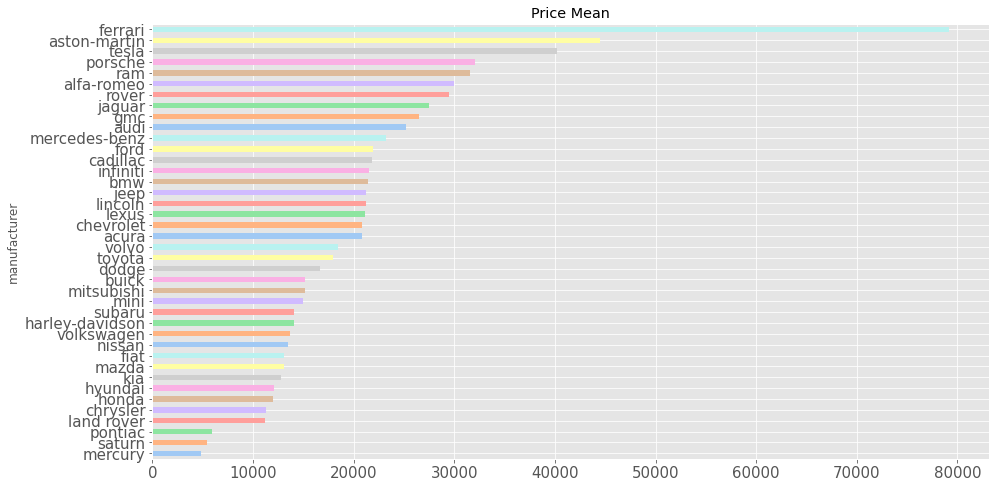

In [33]:
df.groupby('manufacturer')['price'] \
.mean() \
.sort_values() \
.plot(kind = "barh",
      color = colors,
      figsize = (15,8),
      title = "Price Mean",
     fontsize = 15)
plt.show()

At the top of the graph, it is dominated for the most part by premium car manufacturers such as Ferrari.

In [34]:
df.manufacturer = np.where(df.manufacturer == 'rover',
                           'land rover',
                           df.manufacturer)

In [35]:
df.manufacturer.unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'ram',
       'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'chrysler',
       'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru',
       'acura', 'hyundai', 'buick', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'mazda', 'porsche', 'kia', 'land rover', 'ferrari',
       'mini', 'pontiac', 'fiat', 'tesla', 'saturn', 'mercury',
       'harley-davidson', 'aston-martin'], dtype=object)

In [36]:
premium_manufacturers = ['cadillac','jaguar','volvo',
                        'audi','mercedes-benz','bmw',
                       'porsche','land rover','ferrari',
                       'alfa-romeo','gmc','infiniti',
                       'acura','buick','mini','lincoln',
                       'aston-martin','lexus']

We create a list with the name of Premium manufacturers to create an auxiliary variable.

In [37]:
df['premium'] = df.manufacturer \
.apply(lambda x: 'yes' if x in premium_manufacturers else 'no')

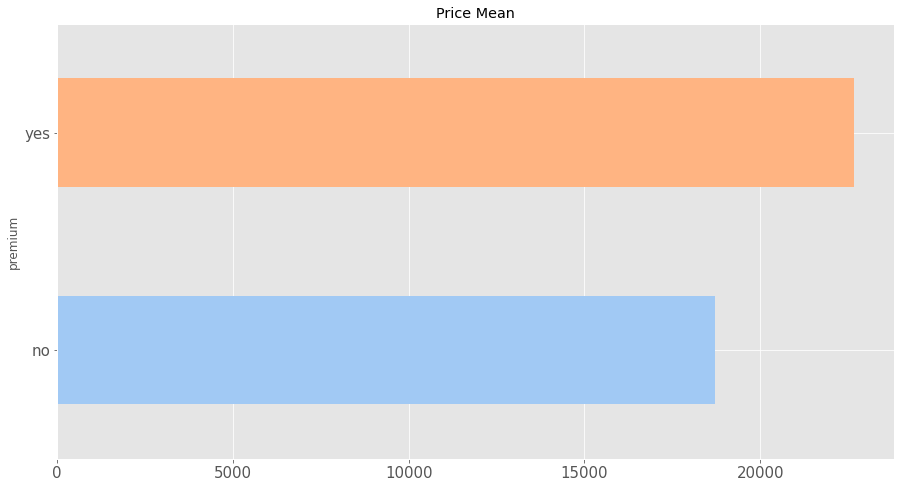

In [38]:
df.groupby('premium')['price'] \
.mean() \
.sort_values() \
.plot(kind = "barh",
      color = colors,
      figsize = (15,8),
      title = "Price Mean",
     fontsize = 15)
plt.show()

Premium brands have a much higher average price, since they are more powerful and safer cars.

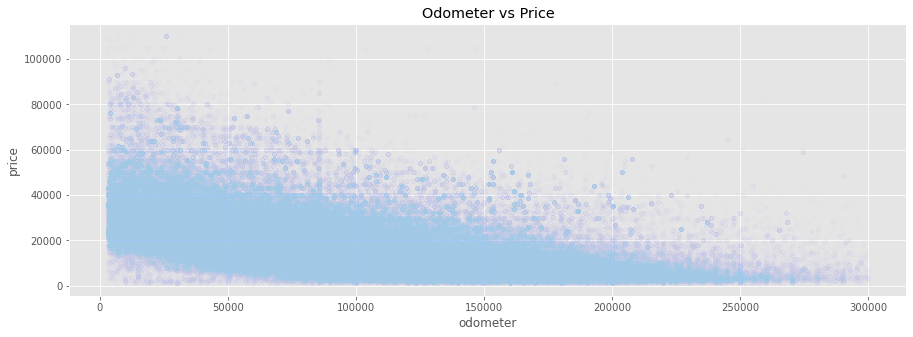

In [40]:
df.plot(kind = "scatter",
        x = "odometer",
        y = "price",
        figsize = (15,5),
        title = "Odometer vs Price",
       alpha = 0.01,
       color = colors[0])
plt.show()

It makes sense that the more mileage a car has, its price goes down as more wear and tear occurs.

In [41]:
df.year = df.year.astype('int')

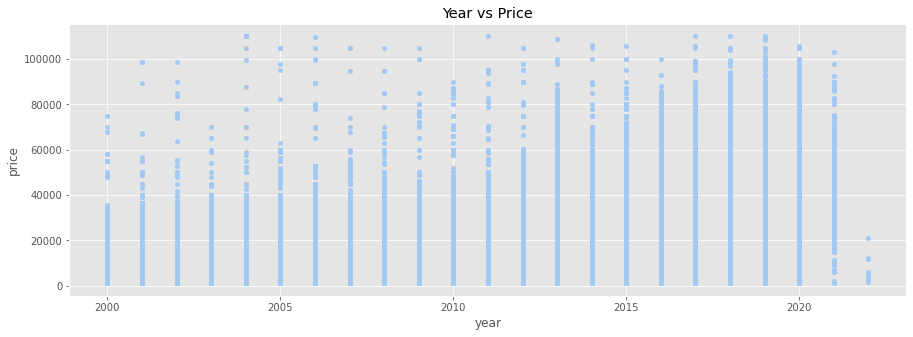

In [42]:
df.plot(kind = "scatter",
        x = "year",
        y = "price",
        figsize = (15,5),
        title = "Year vs Price",
       color = colors[0])
plt.show()

There are cars with a year of manufacture less than the year 2010, a fairly high price since the natural thing is that the price goes down in value, we will calculate an interval to eliminate outliers.There are very few cars belonging to the year 2022, it is better to eliminate them, since it can skew the model and can imply that the more recent the model, the cheaper the car.

In [43]:
df = df.query('year<2022')

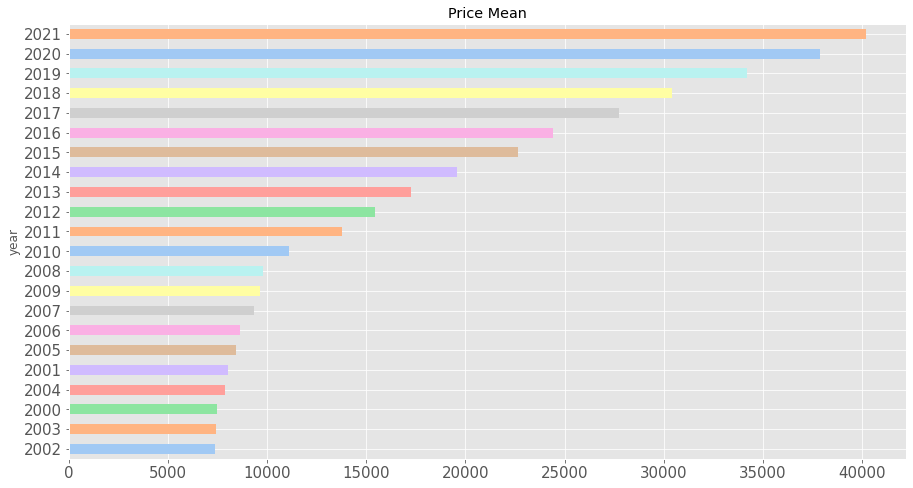

In [44]:
df.groupby('year')['price'] \
.mean() \
.sort_values() \
.plot(kind = "barh",
      color = colors,
      figsize = (15,8),
      title = "Price Mean",
     fontsize = 15)
plt.show()

As we can see in the graph, it is normal for the most recent cars to have a higher price than older models.

In [45]:
def UpperLimit(x):
    return np.round(np.quantile(x,0.99),2)

In [46]:
upper_limits = df.groupby('year')['price'].apply(UpperLimit)

In [47]:
upper_limits

year
2000    33500.00
2001    36500.00
2002    32999.00
2003    31500.00
2004    32800.00
2005    39800.00
2006    36995.00
2007    39500.00
2008    35000.00
2009    36999.76
2010    37990.00
2011    42995.00
2012    46969.00
2013    51880.00
2014    51990.00
2015    57990.00
2016    61495.00
2017    68995.00
2018    69995.80
2019    77995.00
2020    84999.16
2021    89995.00
Name: price, dtype: float64

Calculate the upper range based on the model year of the vehicles.

In [48]:
def delete_outlires_year(df,upper_limits):
    year_dict = {}
    years = np.arange(2001,2021+1,1)
    
    for year,upper_limit in zip(years,upper_limits):
        df_year = df.query('year==@year')
      
        df_year = df_year.query('price<@upper_limit')
        
        year_dict[year] = df_year
        
    return year_dict

We create a function to estimate an upper interval, then we calculate the upper limit based on the year of the model, later we use these intervals to eliminate outliers, we create a loop to make the cleaning faster and save the data in a dictionary to later create a dataframe with the values already cleaned.

In [49]:
df2 = delete_outlires_year(df,upper_limits)

In [50]:
def concatene_df():
    
    year_2001 = df2[2001]
    year_2002 = df2[2002]
    year_2003 = df2[2003]
    year_2004 = df2[2004]
    year_2005 = df2[2005]

    year_2006 = df2[2006]
    year_2007 = df2[2007]
    year_2008 = df2[2008]
    year_2009 = df2[2009]
    year_2010 = df2[2010]
    
    df_year_2001_2010 = pd.concat([year_2001,
                               year_2002,
                               year_2003,
                               year_2004,
                               year_2005,
                              year_2006,
                              year_2007,
                              year_2008,
                              year_2009,
                              year_2010])
    
    
    
    year_2011 = df2[2011]
    year_2012 = df2[2012]
    year_2013 = df2[2013]
    year_2014 = df2[2014]
    year_2015 = df2[2015]
    
    year_2016 = df2[2016]
    year_2017 = df2[2017]
    year_2018 = df2[2018]
    year_2019 = df2[2019]
    year_2020 = df2[2020]
    
    year_2021 = df2[2021]
    
    
    df_year_2011_2021 = pd.concat([year_2011,
                                  year_2012,
                                  year_2013,
                                  year_2014,
                                  year_2015,
                                 year_2016,
                                 year_2017,
                                 year_2018,
                                 year_2019,
                                 year_2020,
                                 year_2021])
    
    df3 = pd.concat([df_year_2001_2010,df_year_2011_2021])
    
    return df3

In [51]:
df3 = concatene_df()

We create a dataframe already without outliers.

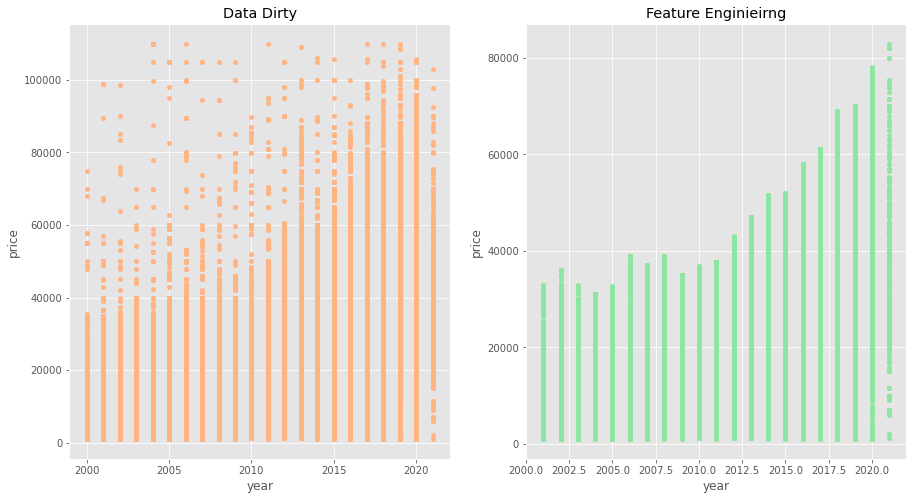

In [53]:
fig,ax = plt.subplots(1,2,figsize = (15,8))

df.plot(kind = "scatter",
        x = "year",
        y = "price",
        title = "Data Dirty",
       color = colors[1],
             ax = ax[0])

df3.plot(kind = "scatter",
        x = "year",
        y = "price",
        title = "Feature Enginieirng",
       color = colors[2],
             ax = ax[1])
       
plt.show()

We observe a better behavior of the data.

In [54]:
df3.dropna(subset = ['condition','cylinders'],inplace = True)

We remove missing values for those columns that have a large percentage of missing values.

In [55]:
df3.shape

(146090, 14)

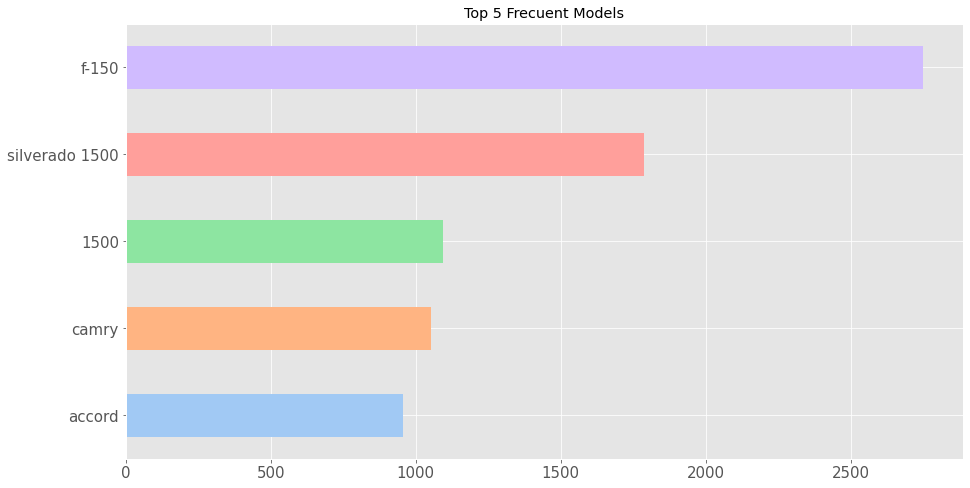

In [56]:
df3.model.value_counts() \
.head() \
.sort_values(ascending=True) \
.plot(kind = "barh",
      color = colors,
      figsize = (15,8),
      title = "Top 5 Frecuent Models",
     fontsize = 15)
plt.show()

It makes sense that the ford f-15o truck is in first place as the best-selling truck in all of history.

In [57]:
serie = df3.model.value_counts()

In [58]:
models = serie[serie < 2]

In [59]:
models

glc300 4matic                   1
sierra 3500hd denali duramax    1
c-class amg c 63                1
e-class e400                    1
altima 2.5 sl sedan             1
                               ..
suzuki xl7 luxury edition       1
Genesis 4.6                     1
escalade suv                    1
savana 3500 box van             1
2021 Silverado                  1
Name: model, Length: 6599, dtype: int64

In [59]:
df3.model = df3.model.apply(lambda x: 'other' if x in models else x)
df3 = df3.query('model!="other"')

We leave all the models that are repeated at least 1 times, otherwise we will assign another category called "Other" to later eliminate them, since they are repeated less frequently and can bias the model.

In [60]:
df3.query('model == "2016"')

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,premium
185107,9000,2016,ford,2016,3.0,4.0,gas,99000.0,lien,automatic,fwd,hatchback,red,no
268206,13950,2016,ford,2016,4.0,4.0,gas,6900.0,clean,automatic,fwd,NaN,red,no
270629,11500,2016,ford,2016,3.0,4.0,gas,81000.0,clean,automatic,fwd,sedan,red,no
290993,29000,2016,ford,2016,4.0,6.0,gas,27000.0,clean,automatic,4wd,truck,white,no
333731,12500,2016,buick,2016,3.0,4.0,gas,18000.0,rebuilt,automatic,fwd,SUV,orange,yes


A data error is shown, perhaps due to an oversight in data collection.

In [61]:
years = ["2001","2001",
         "2002","2003",
         "2004","2005",
         "2006","2007",
         "2008","2009",
         "2010","2011",
        "2012","2013",
         "2014","2015",
         "2016","2017",
         "2018","2019",
         "2020","2021"]

df3.model = df3.model.apply(lambda x: 'other' if x in years else x )

In [62]:
df3.query('model=="other"').head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,premium
3524,4000,2001,ford,other,3.0,8.0,gas,158094.0,clean,automatic,fwd,sedan,white,no
44124,4000,2001,ford,other,2.0,8.0,gas,205398.0,clean,automatic,4wd,pickup,black,no
202957,17500,2001,ford,other,4.0,8.0,gas,69068.0,clean,manual,rwd,convertible,red,no
55417,15000,2002,ford,other,4.0,4.0,gas,160000.0,salvage,manual,rwd,convertible,silver,no
174566,1200,2002,ford,other,1.0,6.0,gas,225000.0,clean,automatic,NaN,NaN,NaN,no


We will assign a new category "other" to all models where they have their year of manufacture in said variable.

In [63]:
df3.shape[0]

146090

In [65]:
corr_data_clear = df3.corr()
corr_data_dirty = df.corr()

### *Correlation Matrix*

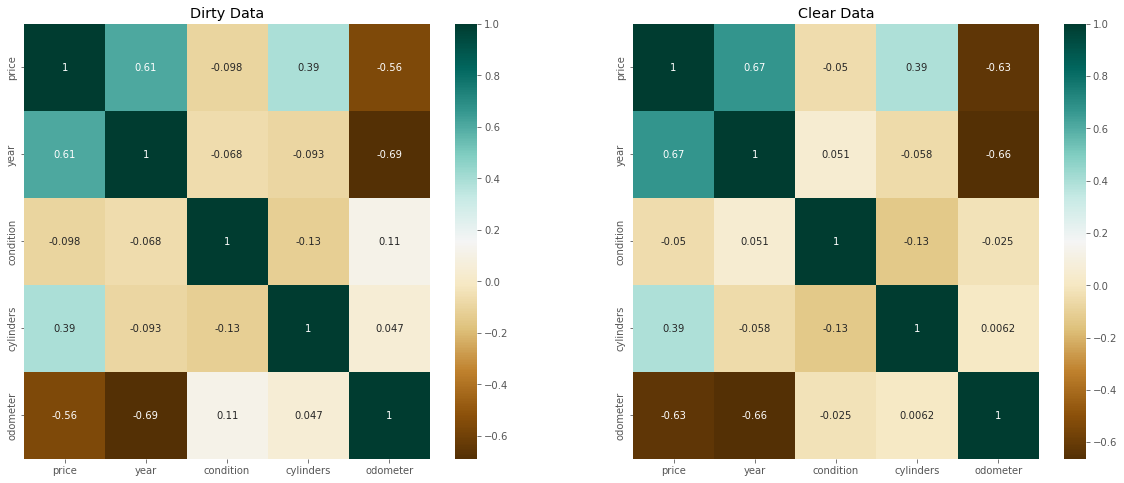

In [66]:
fig,ax = plt.subplots(1,2,figsize = (20,8))
ax[0].set_title('Dirty Data')
sns.heatmap(corr_data_dirty,cmap='BrBG',annot = True,ax = ax[0])

ax[1].set_title('Clear Data')
sns.heatmap(corr_data_clear,cmap='BrBG',annot = True,ax = ax[1])

plt.show()

We observe that a better relationship is seen between the dependent and independent variables, which translates into a better performance of the model.

# Save Data Clear

In [67]:
df3.to_parquet('craiglist_clear.parquet')

Let's save the data in parquet format, so that it is faster to load since later we will use it to create a deep learning model